## Based on the Kaggle notebook: https://www.kaggle.com/someadityamandal/bitcoin-time-series-forecasting

## Some libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import csv


In [2]:
!pip install chart_studio

     |████████████████████████████████| 71kB 4.5MB/s 


In [3]:
import matplotlib.pyplot as plt

from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Importing data

In [5]:
#data = pd.read_csv('../data_extraction/full_data_eth_20072020.csv')
data = pd.read_csv('full_data_eth_20072020.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 20, 2020",238.49,239.58,234.85,236.15,"5,600,686,192","26,411,853,756"
1,"Jul 19, 2020",235.46,239.16,233.28,238.49,"6,251,377,305","26,669,691,075"
2,"Jul 18, 2020",232.86,236.54,232.32,235.48,"5,397,402,117","26,330,601,164"
3,"Jul 17, 2020",233.69,234.42,232.11,232.77,"5,859,850,529","26,024,301,468"
4,"Jul 16, 2020",238.45,239.01,231.62,233.64,"5,832,057,567","26,118,155,895"


In [6]:
data.dtypes

Date          object
Open          object
High          object
Low           object
Close         object
Volume        object
Market Cap    object
dtype: object

## Function to change object to numerical data

In [7]:
def obj_to_num(df,cols):
    def obj_to_num(row):
        row = row.replace(',','')
        return float(row)

    for col in cols: 
        df[col] = df[col].apply(obj_to_num) 
    return df

In [8]:
columns = ['Open','High','Low','Close','Volume','Market Cap']
num_data = obj_to_num(data,columns)
num_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 20, 2020",238.49,239.58,234.85,236.15,5.600686e+09,2.641185e+10
1,"Jul 19, 2020",235.46,239.16,233.28,238.49,6.251377e+09,2.666969e+10
2,"Jul 18, 2020",232.86,236.54,232.32,235.48,5.397402e+09,2.633060e+10
3,"Jul 17, 2020",233.69,234.42,232.11,232.77,5.859851e+09,2.602430e+10
4,"Jul 16, 2020",238.45,239.01,231.62,233.64,5.832058e+09,2.611816e+10


In [9]:
from datetime import datetime
num_data['Date'] = num_data['Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d'))
num_data['Date'] = pd.to_datetime(num_data['Date'], utc=True)
num_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-07-20 00:00:00+00:00,238.49,239.58,234.85,236.15,5.600686e+09,2.641185e+10
1,2020-07-19 00:00:00+00:00,235.46,239.16,233.28,238.49,6.251377e+09,2.666969e+10
2,2020-07-18 00:00:00+00:00,232.86,236.54,232.32,235.48,5.397402e+09,2.633060e+10
3,2020-07-17 00:00:00+00:00,233.69,234.42,232.11,232.77,5.859851e+09,2.602430e+10
4,2020-07-16 00:00:00+00:00,238.45,239.01,231.62,233.64,5.832058e+09,2.611816e+10


In [10]:
num_data.dtypes

Date          datetime64[ns, UTC]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                    float64
Market Cap                float64
dtype: object

## Making data plots

In [11]:
!pip install pytz

In [12]:
# create valid date range
import pytz
start = datetime(2013, 3, 5, 0, 0, 0, 0, pytz.UTC)
end = datetime(2020, 7, 20, 0, 0, 0, 0, pytz.UTC)

# find rows between start and end time and find the first row (00:00 monday morning)
weekly_rows = num_data[(num_data['Date'] >= start) & (num_data['Date'] <= end)].groupby([pd.Grouper(key='Date', freq='W-MON')]).first().reset_index()
weekly_rows.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2015-08-10 00:00:00+00:00,0.713989,0.729854,0.636546,0.708448,405283.0,42818364.0
1,2015-08-17 00:00:00+00:00,1.580000,1.580000,1.190000,1.200000,1942830.0,87295367.0
2,2015-08-24 00:00:00+00:00,1.350000,1.360000,1.230000,1.230000,924920.0,89515257.0
3,2015-08-31 00:00:00+00:00,1.320000,1.400000,1.200000,1.360000,1447180.0,98963975.0
4,2015-09-07 00:00:00+00:00,1.300000,1.310000,1.240000,1.250000,489014.0,91020735.0


In [13]:
#import chart_studio.plotly as py
import plotly.graph_objects as go
import chart_studio as py

In [14]:
#user = input('type username:')
#key = input('type key:')
py.tools.set_credentials_file(username='ji_nb', api_key='eGoxXwU4vG6jV7WJVzpw')
#py.tools.set_credentials_file(username=user, api_key=key)

In [15]:
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Open'].astype(float),
    mode = 'lines',
    name = 'Open'
)

trace2 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Close'].astype(float),
    mode = 'lines',
    name = 'Close'
)
trace3 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['High'].astype(float),
    mode = 'lines',
    name = 'High'
)
trace4 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Low'].astype(float),
    mode = 'lines',
    name = 'Low'
)

layout = dict(
    title='Historical ETH Prices (...-2020) with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1day',
                     step='day',
                     stepmode='backward'),
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1, trace2, trace3, trace4]
fig = dict(data=data.copy(), layout=layout)
py.plotly.iplot(fig, filename = "Time_Series_with_Rangeslider")

In [16]:
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Volume'].astype(float),
    mode = 'lines',
    name = 'ETH Price (Open)'
)

layout = dict(
    title='Historical ETH Volume (USD) (...-2020)',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data.copy(), layout=layout)
py.plotly.iplot(fig, filename = "Time Series with Rangeslider")

## Function to get data from time series

In [17]:
def prepare_data(file):
  dateparse = lambda x: pd.datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d')
  data  = pd.read_csv(file, parse_dates=[0], date_parser=dateparse)
  columns = ['Open','High','Low','Close','Volume','Market Cap']
  num_data = obj_to_num(data,columns)
  data['Date'] = data['Date'].dt.tz_localize(None)
  data = data.groupby([pd.Grouper(key='Date', freq='H')]).first().reset_index()
  data = data.set_index('Date')
  data = data[['High']]
  data.dropna(subset=['High'], inplace=True)
  return data

## First time series LSTM

### Firs of all we don't have enough data so I think this LSTM model is going to be underfitted

In [18]:
file = 'full_data_eth_20072020.csv'
data = prepare_data(file)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



,High
Date,
2015-08-07,3.540000
2015-08-08,2.800000
2015-08-09,0.879810
2015-08-10,0.729854
2015-08-11,1.130000


In [19]:
split_date = '01-Jul-2020'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

In [20]:
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))


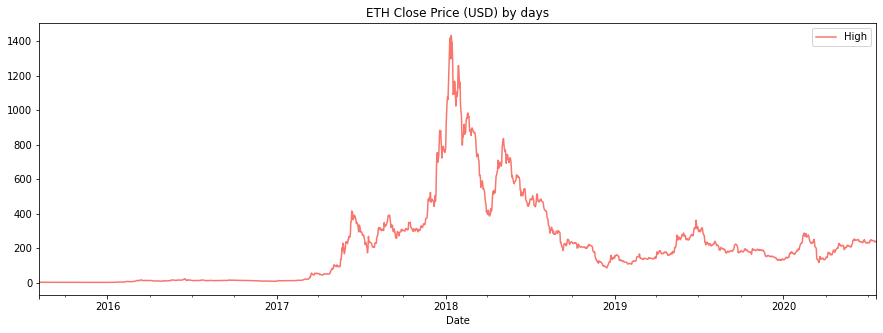

In [21]:
_ = data.plot(style='', figsize=(15,5), color="#F8766D", title='ETH Close Price (USD) by days')

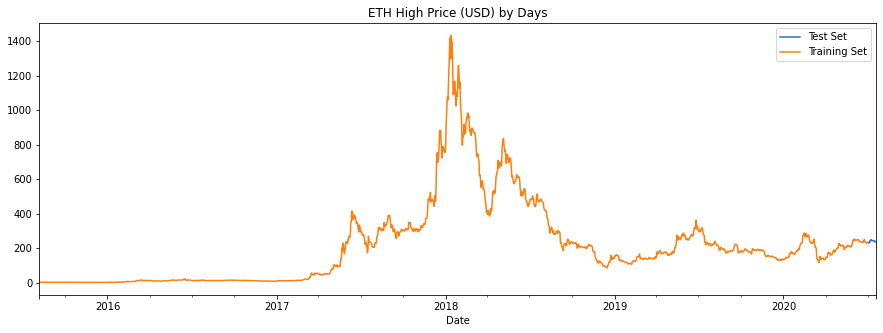

In [22]:
_ = data_test \
    .rename(columns={'High': 'Test Set'}) \
    .join(data_train.rename(columns={'High': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='ETH High Price (USD) by Days', style='')

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation


model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=False)

Using TensorFlow backend.


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Making the predictions
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_ETH_price = model.predict(inputs)
predicted_ETH_price = sc.inverse_transform(predicted_ETH_price)

In [26]:
data_test['High_prediction'] = predicted_ETH_price
data_all = pd.concat([data_test, data_train], sort=False)

In [27]:
final_data = data_all
final_data = final_data.reset_index()
final_data = final_data.rename(columns={'High_prediction': 'lstm'})  #Rename Close_pred as lstm
final_data = final_data[['Date','High','lstm']]
final_data.head()

,Date,High,lstm
0,2020-07-02,232.40,223.730713
1,2020-07-03,229.63,221.207855
2,2020-07-04,230.05,221.590302
3,2020-07-05,229.86,221.417297
4,2020-07-06,242.13,232.602188


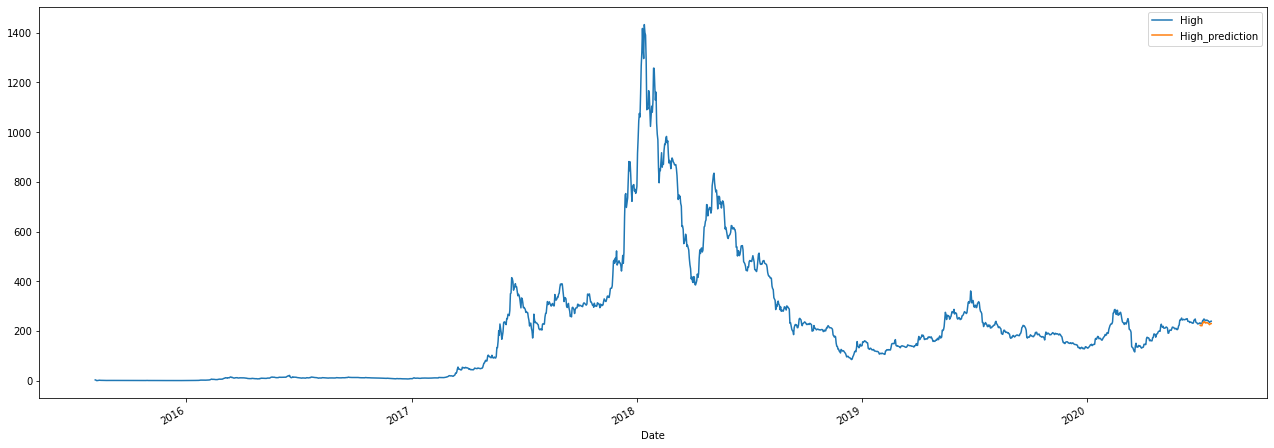

In [35]:
_ = data_all[['High','High_prediction']].plot(figsize=(22, 8))

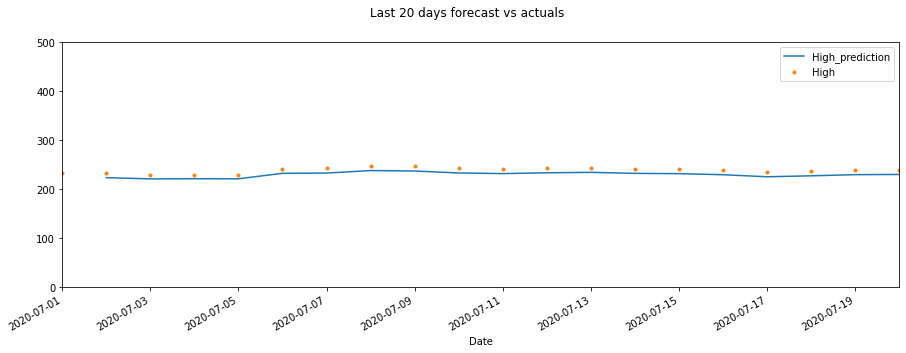

In [36]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['High_prediction','High']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='07-01-2020', upper='07-20-2020')
ax.set_ylim(0, 500)
plot = plt.suptitle('Last 20 days forecast vs actuals')

In [37]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
mse(y_true=data_test['High'], y_pred=data_test['High_prediction'])

86.28729809694319

In [38]:
mae(y_true=data_test['High'], y_pred=data_test['High_prediction'])

9.276276148745888

## XGBoost model time series

In [39]:
!pip install dateparser

     |████████████████████████████████| 368kB 6.0MB/s 


In [40]:
#from fbprophet import Prophet
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
import dateparser
plt.style.use('fivethirtyeight')

In [41]:
file = 'full_data_eth_20072020.csv'
data = prepare_data(file)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



,High
Date,
2015-08-07,3.540000
2015-08-08,2.800000
2015-08-09,0.879810
2015-08-10,0.729854
2015-08-11,1.130000


In [42]:
data.dtypes

High    float64
dtype: object

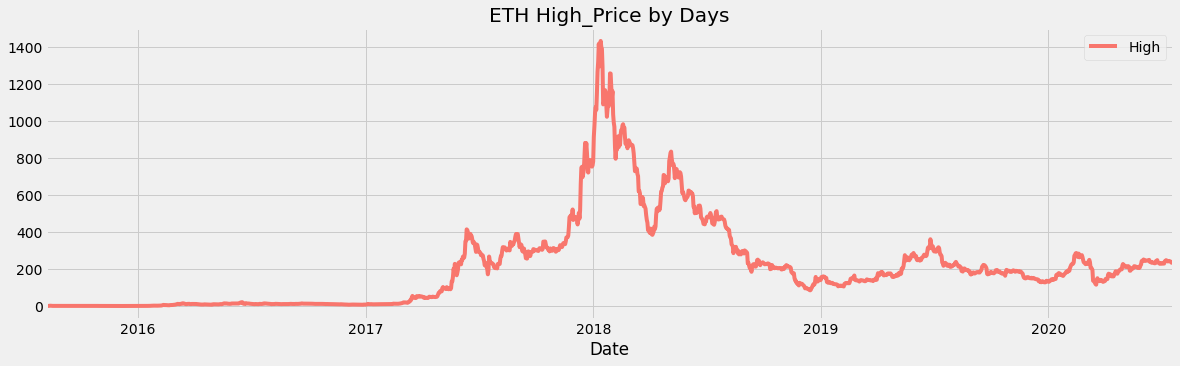

In [43]:
_ = data.plot(style='', figsize=(18,5), color="#F8766D", title='ETH High_Price by Days')

In [44]:
split_date = '2020-07-01'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

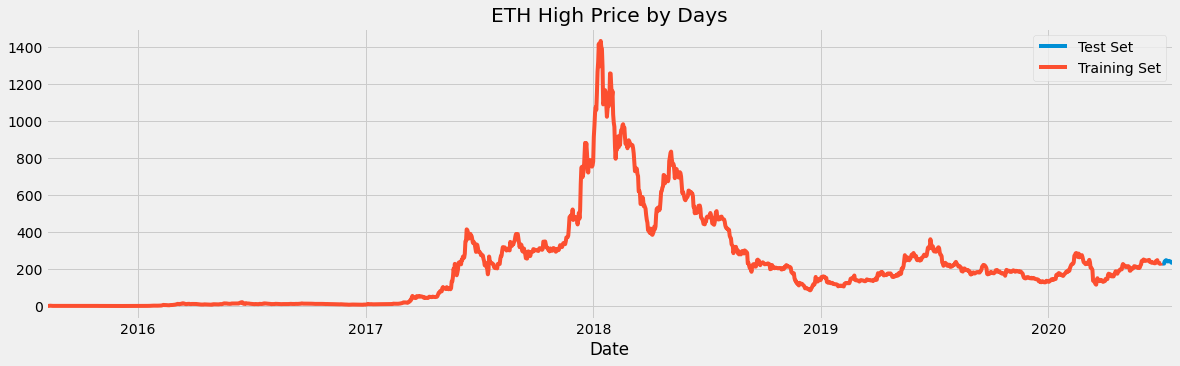

In [45]:
_ = data_test \
    .rename(columns={'High': 'Test Set'}) \
    .join(data_train.rename(columns={'High': 'Training Set'}), how='outer') \
    .plot(figsize=(18,5), title='ETH High Price by Days', style='')

In [46]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [47]:
X_train, y_train = create_features(data_train, label='High')
X_test, y_test = create_features(data_test, label='High')

In [48]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[02:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=10, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [49]:
data_test['High_prediction'] = model.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

In [50]:
#final_data = datat.copy()
final_data = pd.merge(final_data, data_all, sort=False)
final_data = final_data.rename(columns={'High_prediction': 'xgboost'})
final_data = final_data[['Date','High','lstm','xgboost']]
final_data.head()

,Date,High,lstm,xgboost
0,2020-07-02,232.40,223.730713,246.598114
1,2020-07-03,229.63,221.207855,243.131058
2,2020-07-04,230.05,221.590302,243.348419
3,2020-07-05,229.86,221.417297,240.372940
4,2020-07-05,229.86,221.417297,NaN


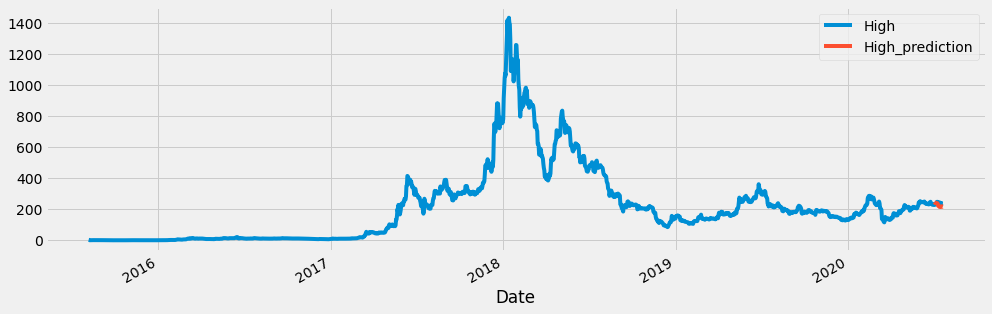

In [52]:
_ = data_all[['High','High_prediction']].plot(figsize=(15, 5))

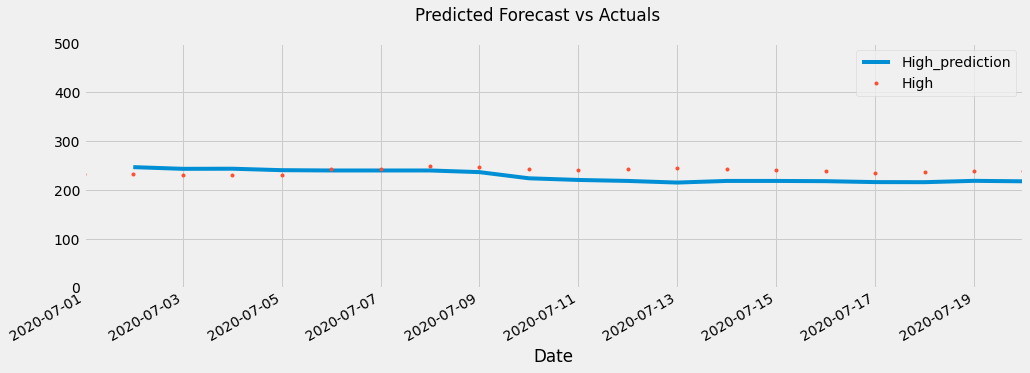

In [53]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['High_prediction','High']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='2020-07-01', upper='2020-07-20')
ax.set_ylim(0, 500)
plot = plt.suptitle('Predicted Forecast vs Actuals')

In [54]:
mse(y_true=data_test['High'],
                   y_pred=data_test['High_prediction'])

335.09682942703046

In [55]:
mae(y_true=data_test['High'],
                   y_pred=data_test['High_prediction'])

16.839385954204353

### This model seems to have a better performance but just for the close prediction of 20 days

## Prophet model

In [56]:
from fbprophet import Prophet

In [57]:
file = 'full_data_eth_20072020.csv'
data = prepare_data(file)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



,High
Date,
2015-08-07,3.540000
2015-08-08,2.800000
2015-08-09,0.879810
2015-08-10,0.729854
2015-08-11,1.130000


In [58]:
split_date = '2020-07-01'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

In [59]:
data_train = data_train.reset_index().rename(columns={'Date':'ds', 'High':'y'})

In [60]:
model = Prophet()
model.fit(data_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
data_test_fcst = model.predict(df=data_test.reset_index().rename(columns={'Date':'ds'}))

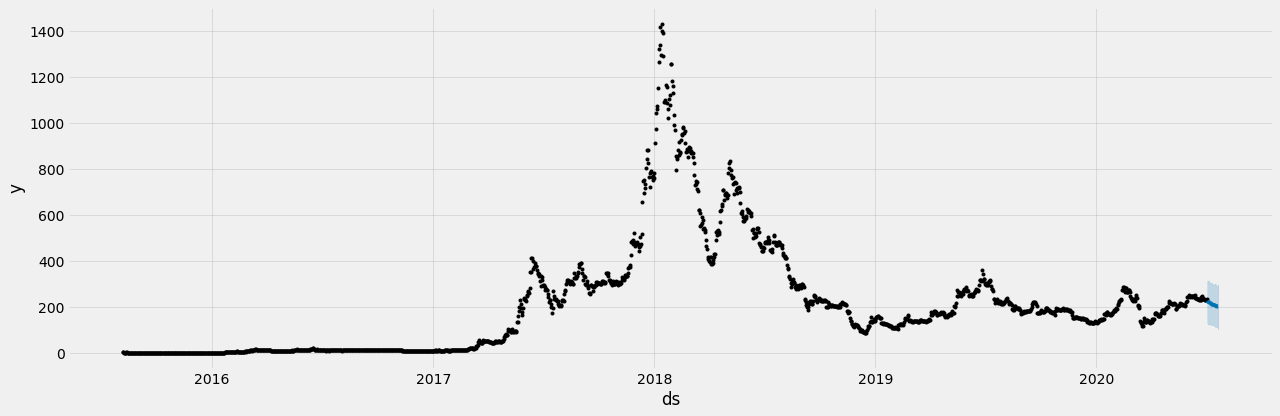

In [63]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(18)
fig = model.plot(data_test_fcst, ax=ax)

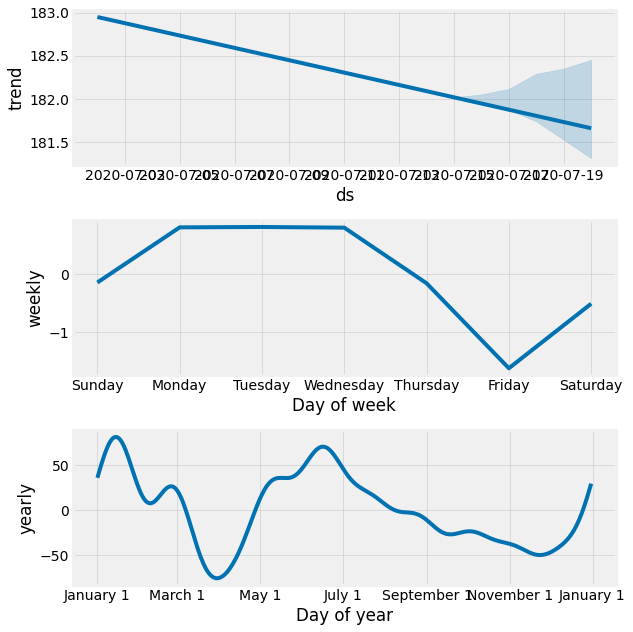

In [64]:
fig = model.plot_components(data_test_fcst)

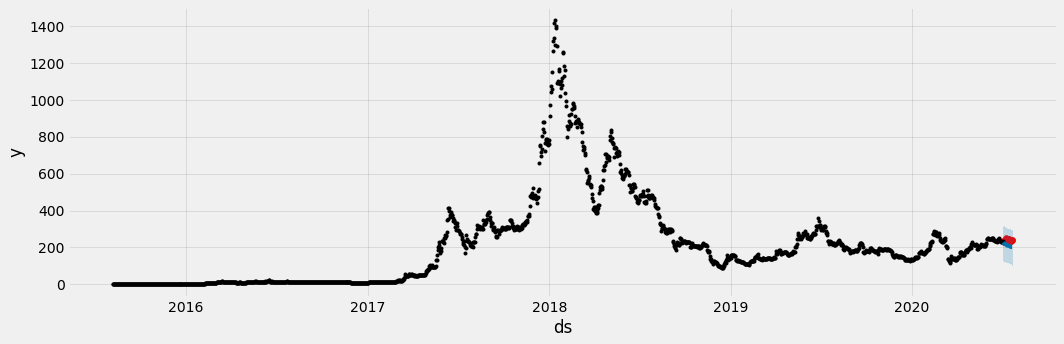

In [65]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(data_test.index, data_test['High'], color='r')
fig = model.plot(data_test_fcst, ax=ax)

In [66]:
data_fcst = data_test_fcst
data_fcst = data_fcst.rename(columns={'ds': 'Date'})
data_all = pd.concat([data_fcst, data_train], sort=False)
final_data = pd.merge(final_data, data_all, sort=False)
final_data = final_data.rename(columns={'yhat': 'prophet'})
final_data = final_data[['Date','High','lstm','xgboost','prophet']]

In [77]:
final_data.head()

,Date,High,lstm,xgboost,prophet
0,2020-07-02,232.40,223.730713,246.598114,226.237200
1,2020-07-03,229.63,221.207855,243.131058,222.509286
2,2020-07-04,230.05,221.590302,243.348419,221.449226
3,2020-07-05,229.86,221.417297,240.372940,219.757834
4,2020-07-05,229.86,221.417297,NaN,219.757834


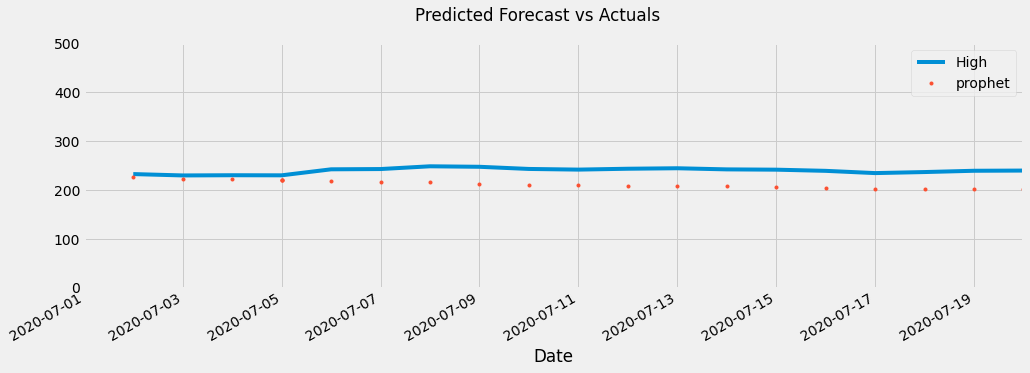

In [81]:
final_data2 = final_data.copy()
final_data2 = final_data2.set_index('Date') 
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = final_data2[['High','prophet']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='2020-07-01', upper='2020-07-20')
ax.set_ylim(0, 500)
plot = plt.suptitle('Predicted Forecast vs Actuals')

In [82]:
mse(y_true=data_test['High'], y_pred=data_test_fcst['yhat'])

887.6778502552081

In [83]:
mae(y_true=data_test['High'], y_pred=data_test_fcst['yhat'])

27.78351389798513

## Visualization - LSTM Vs XGBoost Vs Prophet

In [90]:
final_data

,Date,High,lstm,xgboost,prophet
0,2020-07-02,232.40,223.730713,246.598114,226.237200
1,2020-07-03,229.63,221.207855,243.131058,222.509286
2,2020-07-04,230.05,221.590302,243.348419,221.449226
3,2020-07-05,229.86,221.417297,240.372940,219.757834
4,2020-07-05,229.86,221.417297,NaN,219.757834
5,2020-07-05,229.86,221.417297,NaN,219.757834
6,2020-07-06,242.13,232.602188,239.756744,218.772180
7,2020-07-07,242.68,233.104034,239.756744,216.974165
8,2020-07-08,248.31,238.244690,239.756744,215.288229
9,2020-07-09,247.29,237.312973,236.386353,212.786166


In [92]:
trace0 = go.Scatter(
    x = final_data['Date'],
    y = final_data['High'],
    mode = 'lines+markers',
    name = 'Real Price'
)
trace1 = go.Scatter(
    x = final_data['Date'],
    y = final_data['lstm'],
    mode = 'lines+markers',
    name = 'LSTM Prediction'
)
trace2 = go.Scatter(
    x = final_data['Date'],
    y = final_data['xgboost'],
    mode = 'lines+markers',
    name = 'XGBoost Prediction'
)
trace3 = go.Scatter(
    x = final_data['Date'],
    y = final_data['prophet'],
    mode = 'lines+markers',
    name = 'Prophet Prediction'
)

# Edit the layout
layout = dict(title = 'Comparision of LSTM,XGBoost and Prophet',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Prices (USD)'),
              )

data = [trace0, trace1, trace2, trace3]
fig = dict(data=data.copy(), layout=layout)
py.plotly.iplot(fig, filename='styled-line')

## Sarimax model

In [103]:
file = 'full_data_eth_20072020.csv'
data = prepare_data(file)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



,High
Date,
2015-08-07,3.540000
2015-08-08,2.800000
2015-08-09,0.879810
2015-08-10,0.729854
2015-08-11,1.130000


In [95]:
!pip install pyramid-arima

     |████████████████████████████████| 604kB 7.9MB/s 


In [97]:
from pyramid.arima import auto_arima
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

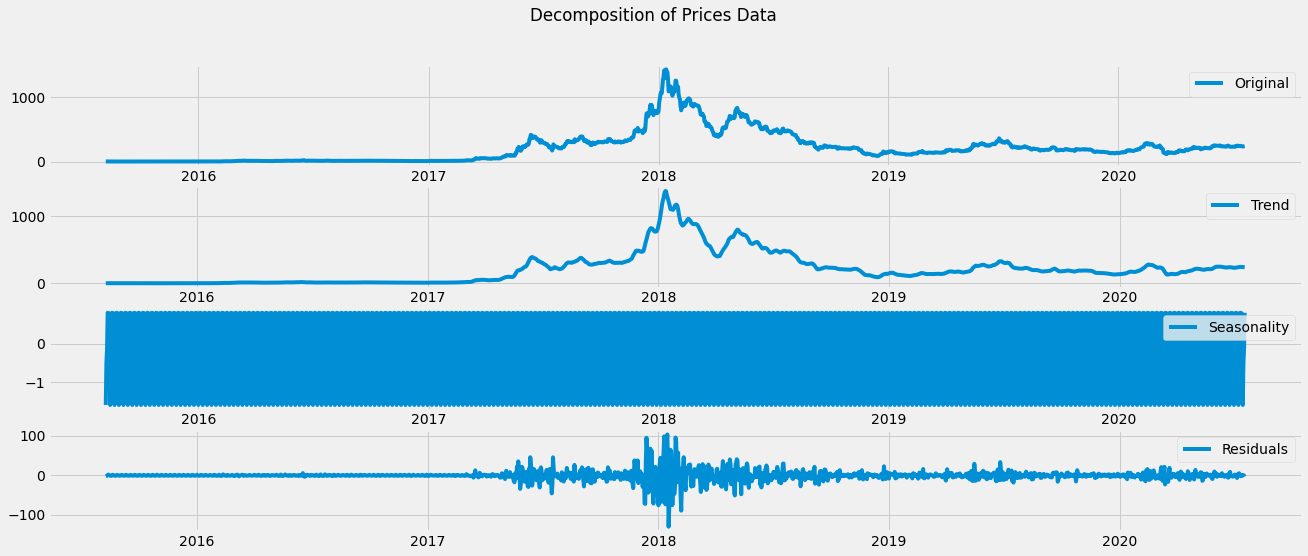

In [105]:
decomposition = sm.tsa.seasonal_decompose(data.High)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20,8))

plt.subplot(411)
plt.plot(data.High, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

fig.suptitle('Decomposition of Prices Data')
plt.show()

In [106]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(data.High)[1])

Dickey–Fuller test: p=0.101625


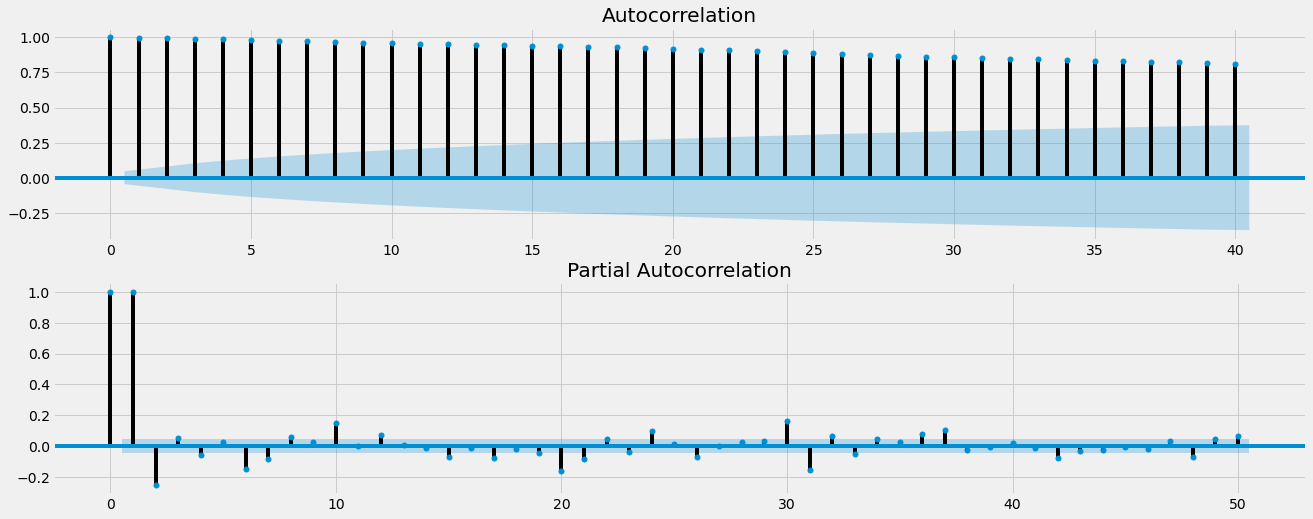

In [108]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(20,8))
pyplot.subplot(211)
plot_acf(data.High, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(data.High, ax=pyplot.gca(), lags=50)
pyplot.show()

In [109]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(data.High, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12),enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=-1)
    except ValueError:
        #print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

Dickey–Fuller test:: p=0.000000


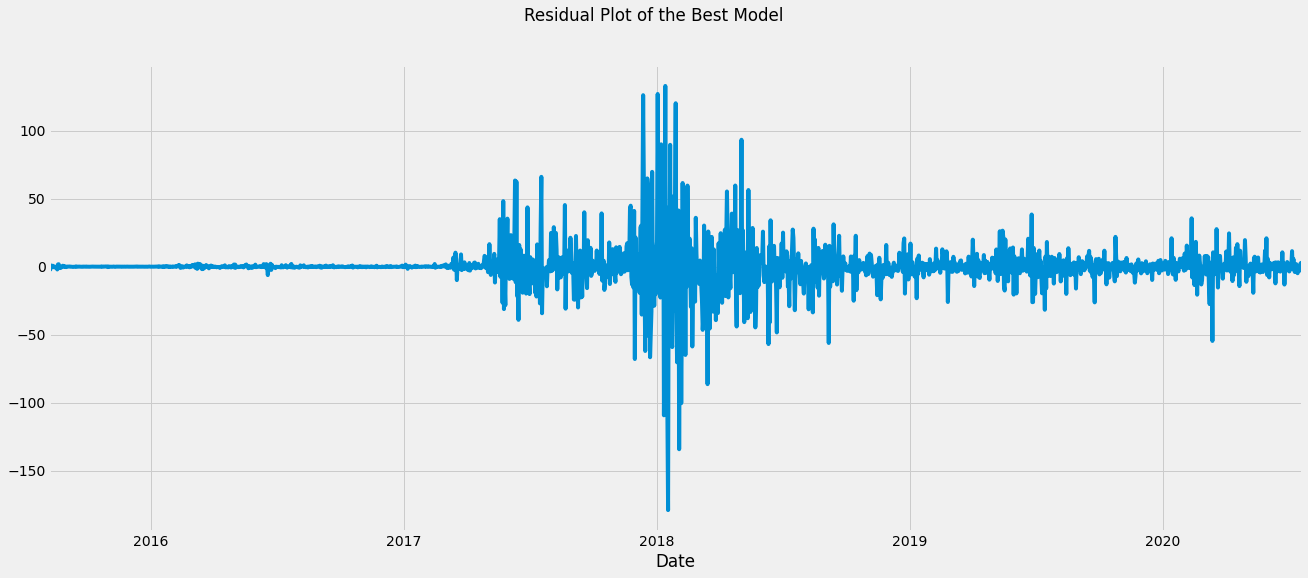

In [110]:
fig = plt.figure(figsize=(20,8))
best_model.resid.plot()
fig.suptitle('Residual Plot of the Best Model')
print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

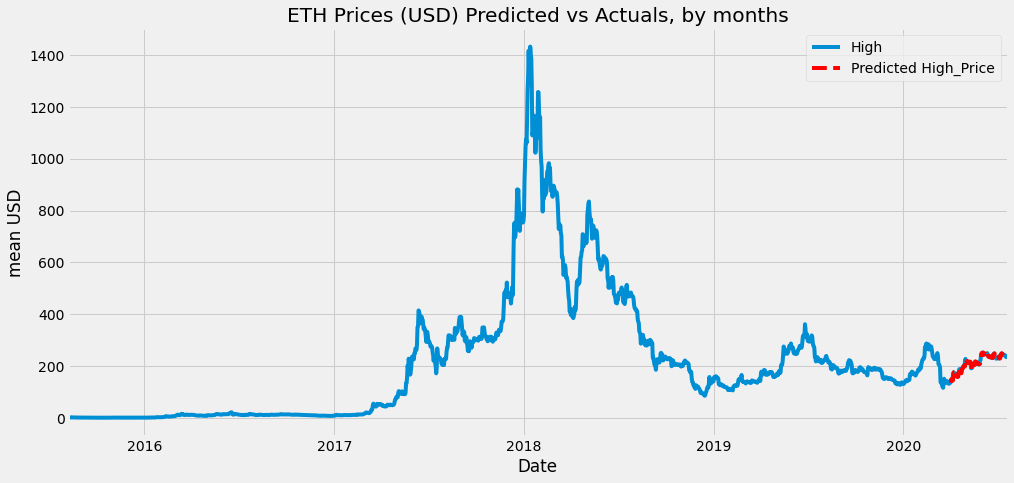

In [118]:
df_month2 = data[['High']]
future = pd.DataFrame()
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=1700, end=1800)
plt.figure(figsize=(15,7))
df_month2.High.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted High_Price')
plt.legend()
plt.title('ETH Prices (USD) Predicted vs Actuals, by months')
plt.ylabel('mean USD')
plt.show()

In [126]:
df_month2['forecast'] = best_model.predict(start=1750, end=1810)
df_month2[-20:]

,High,forecast
Date,,
2020-07-01,232.76,230.474917
2020-07-02,232.40,235.906731
2020-07-03,229.63,231.187201
2020-07-04,230.05,229.819219
2020-07-05,229.86,228.989186
2020-07-06,242.13,230.712808
2020-07-07,242.68,244.482987
2020-07-08,248.31,242.647225
2020-07-09,247.29,249.419187


## Arima model